# Laboratory of Computational Physics mod.B

## First assignment

### Group name: 
LoCPdown
### Components:
* Campesan Giulia (2027592)
* Faorlin Tommaso (2021857)
* Marcomini Alessandro 

In [100]:
#import

import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from tqdm.notebook import tqdm
import pandas as pd

# 2

The first function to be minimised is the following one:
$$f(x,y)=b\left(1-e^{-\frac{1}{2}(x^2+y^2)}\right)+\frac{1}{2}\,q\,(-x^3+y)^2$$
Now we plot it.

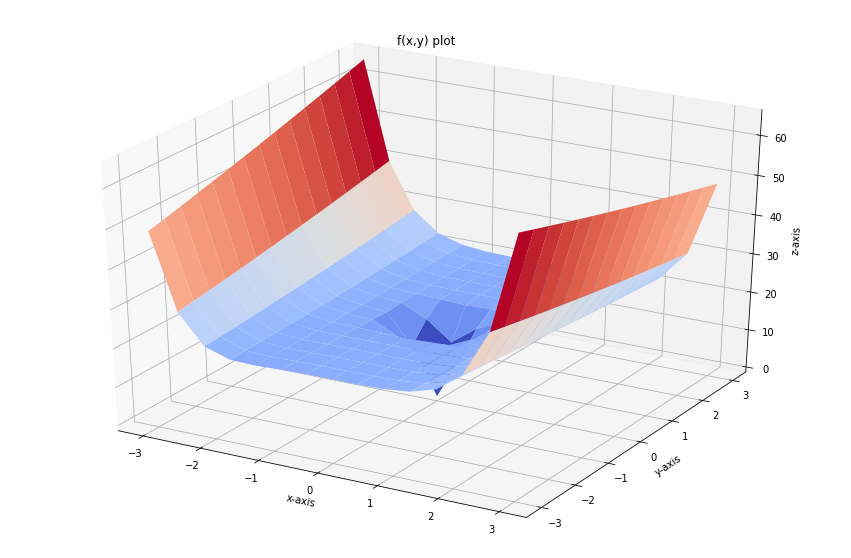

In [123]:
#parameters
b = 20
q = 0.1
w = 10
n_epochs = 5000

fig = plt.figure(figsize=(15,10))
ax = fig.gca(projection='3d')

#defining the first function
def surf_1(x, y, b, q, w):
    return b*(1-np.exp(-.5*w*(x**2+y**2)))+.5*q*(-x**3+y)**2

#defining the gradients of the first function along the two directions
def grad_surf_1(params): 
    x=params[0]
    y=params[1]
    grad_x= b*np.exp(-0.5*w*(x**2+y**2))*w*x-3*q*x**2*(-x**3+y)
    grad_y= b*np.exp(-0.5*w*(x**2+y**2))*w*y+q*(-x**3+y)
    return [grad_x,grad_y]

X = np.linspace(-3, 3, 15)
Y = np.linspace(-3, 3, 15)
xm, ym = np.meshgrid(X, Y)
Z = surf_1(xm, ym, b, q, w)

surf = ax.plot_surface(xm,ym,Z, cmap = cm.coolwarm)

ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
plt.title("f(x,y) plot")

plt.show()

In the following cell we import the gradient descent methods from the notebook we were given. 
We have set the following values for the learning rates:
* gd, gd with momentum, nag: $\eta=10^{-4}$,
* RMS prop, Adam: $\eta=10^{-3}$.

The learning rate for RMSprop and Adam can be set at a higher value wrt the one of the others, thank to the fact that they implement an adaptive learning rate.

The values for $\beta$, $\gamma$ and $\epsilon$ are the one reported in the paper [Mehta]:
* $\beta$=0.99,
* $\gamma$=0.9,
* $\epsilon=10^{-8}$.

WWe have set the number of epo

In [ ]:
def gd(grad, init, n_epochs, eta = 10**-2, noise_strength = 0):
    #This is a simple optimizer
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1,2])
    param_traj[0,]=init
    v=0;
    for j in range(n_epochs):
        noise=noise_strength*np.random.randn(params.size)
        v=eta*(np.array(grad(params))+noise)
        params=params-v
        param_traj[j+1,]=params
    return param_traj

def gd_with_mom(grad, init, n_epochs, eta = 10**-2, gamma=0.9, noise_strength=0):
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1,2])
    param_traj[0,]=init
    v=0
    for j in range(n_epochs):
        noise=noise_strength*np.random.randn(params.size)
        v=gamma*v+eta*(np.array(grad(params))+noise)
        params=params-v
        param_traj[j+1,]=params
    return param_traj

def NAG(grad, init, n_epochs, eta = 10**-3, gamma=0.9, noise_strength=0):
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1,2])
    param_traj[0,]=init
    v=0
    for j in range(n_epochs):
        noise=noise_strength*np.random.randn(params.size)
        params_nesterov=params-gamma*v
        v=gamma*v+eta*(np.array(grad(params_nesterov))+noise)
        params=params-v
        param_traj[j+1,]=params
    return param_traj


def rms_prop(grad, init, n_epochs, eta= 10**-2, beta=0.9, epsilon=10**-8, noise_strength=0):
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1,2])
    param_traj[0,]=init
    grad_sq=0;
    for j in range(n_epochs):
        noise=noise_strength*np.random.randn(params.size)
        g=np.array(grad(params))+noise
        grad_sq=beta*grad_sq+(1-beta)*g*g
        v=eta*np.divide(g,np.sqrt(grad_sq+epsilon))
        params= params-v
        param_traj[j+1,]=params
    return param_traj
                        
                        
def adams(grad, init, n_epochs, eta = 10**-2, gamma=0.9, beta=0.99,epsilon=10**-8,noise_strength=0):
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1,2])
    param_traj[0,]=init
    v=0;
    grad_sq=0;
    for j in range(n_epochs):
        noise=noise_strength*np.random.randn(params.size)
        g=np.array(grad(params))+noise
        v=gamma*v+(1-gamma)*g
        grad_sq=beta*grad_sq+(1-beta)*g*g
        v_hat=v/(1-gamma)
        grad_sq_hat=grad_sq/(1-beta)
        params=params-eta*np.divide(v_hat,np.sqrt(grad_sq_hat+epsilon))
        param_traj[j+1,]=params
    return param_traj


fun_dict = {
    'vanilla'  : gd,
    'momentum' : gd_with_mom,
    'nag'      : NAG,
    'rms'      : rms_prop,
    'adams'    : adams
    }

## Vanilla gradient descent tuning 

In [140]:
#initialising lists

avgs = []
init = [0,0]

#defining a list of different learning parameters
etas = [10**-4, 10**-3, 10**-2]
for eta in tqdm(etas):
    avg = []
    traj_list = []
    for i in range(len(X)):
        for j in range(len(Y)):
            init[0] = X[i]
            init[1] = Y[j]
            init = np.asarray(init)
            traj_list.append(gd(grad_surf_1, init, n_epochs, eta))
            
    traj_list = np.array(traj_list).reshape(len(X),len(Y),n_epochs+1,2)
    trajectories.append(traj_list)


    for e in range(n_epochs+1):
        temp = 0
        for i in range(len(X)):
            for j in range(len(Y)):
                x,y = traj_list[i][j][e]
                temp += surf_1(x, y, b, q, w)
        temp /= (len(X)*len(Y))
        avg.append(temp)
    avgs.append(avg)

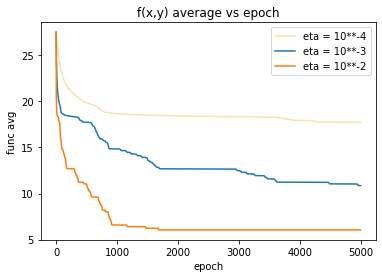

In [141]:
plt.plot(avgs[0], label = 'eta = 10**-4', color = '#f3e5ab')
plt.plot(avgs[1], label = 'eta = 10**-3')
plt.plot(avgs[2], label = 'eta = 10**-2')


plt.title('f(x,y) average vs epoch')
plt.xlabel('epoch')
plt.ylabel('func avg')
plt.legend()

plt.show()

## Gradient descent with momentum tuning 

In [142]:
#defining a list of different learning parameters
etas = [10**-4, 10**-3, 10**-2]
avgs=[]
for eta in tqdm(etas):
    avg = []
    traj_list = []
    init = [0,0]
    for i in range(len(X)):
        for j in range(len(Y)):
            init[0] = X[i]
            init[1] = Y[j]
            init = np.asarray(init)
            traj_list.append(gd_with_mom(grad_surf_1, init, n_epochs, eta))
            
    traj_list = np.array(traj_list).reshape(len(X),len(Y),n_epochs+1,2)
    trajectories.append(traj_list)


    for e in range(n_epochs+1):
        temp = 0
        for i in range(len(X)):
            for j in range(len(Y)):
                x,y = traj_list[i][j][e]
                temp += surf_1(x, y, b, q, w)
        temp /= (len(X)*len(Y))
        avg.append(temp)
    avgs.append(avg)

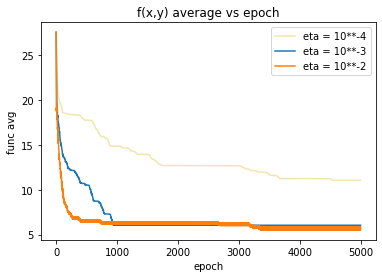

In [143]:
plt.plot(avgs[0], label = 'eta = 10**-4', color = '#f3e5ab')
plt.plot(avgs[1], label = 'eta = 10**-3')
plt.plot(avgs[2], label = 'eta = 10**-2')


plt.title('f(x,y) average vs epoch')
plt.xlabel('epoch')
plt.ylabel('func avg')
plt.legend()

plt.show()

## NAG gradient descent

In [144]:
#defining a list of different learning parameters
etas = [10**-4, 10**-3, 10**-2]
avgs=[]
for eta in tqdm(etas):
    avg = []
    traj_list = []
    init = [0,0]
    for i in range(len(X)):
        for j in range(len(Y)):
            init[0] = X[i]
            init[1] = Y[j]
            init = np.asarray(init)
            traj_list.append(NAG(grad_surf_1, init, n_epochs, eta))
            
    traj_list = np.array(traj_list).reshape(len(X),len(Y),n_epochs+1,2)
    trajectories.append(traj_list)


    for e in range(n_epochs+1):
        temp = 0
        for i in range(len(X)):
            for j in range(len(Y)):
                x,y = traj_list[i][j][e]
                temp += surf_1(x, y, b, q, w)
        temp /= (len(X)*len(Y))
        avg.append(temp)
    avgs.append(avg)

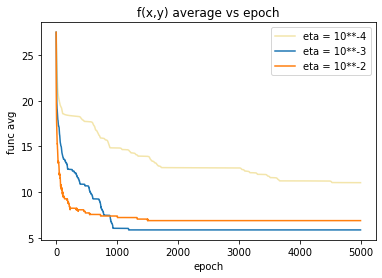

In [145]:
plt.plot(avgs[0], label = 'eta = 10**-4', color = '#f3e5ab')
plt.plot(avgs[1], label = 'eta = 10**-3')
plt.plot(avgs[2], label = 'eta = 10**-2')


plt.title('f(x,y) average vs epoch')
plt.xlabel('epoch')
plt.ylabel('func avg')
plt.legend()

plt.show()

## Final comparison

In [ ]:
trajectories = []
avgs = []

for func_key in tqdm(fun_dict):
    print('Gradient: ', func_key)
    traj_list = []
    avg = []
    init = [0,0]
    for i in range(len(X)):
        for j in range(len(Y)):
            init[0] = X[i]
            init[1] = Y[j]
            init = np.asarray(init)
            
            traj_list.append(fun_dict[func_key](grad_surf_1, init, n_epochs))
    
   
    
    traj_list = np.array(traj_list).reshape(len(X),len(Y),n_epochs+1,2)
    trajectories.append(traj_list)
    

    for e in range(n_epochs+1):
        temp = 0
        for i in range(len(X)):
            for j in range(len(Y)):
                x,y = traj_list[i][j][e]
                temp += surf_1(x, y, b, q, w)
        temp /= (len(X)*len(Y))
        avg.append(temp)
    avgs.append(avg)
   

In [ ]:
plt.plot(avgs[0], label = 'Vanilla gradient', color = '#f3e5ab')
plt.plot(avgs[1], label = 'Momentum')
plt.plot(avgs[2], label = 'NAG')
plt.plot(avgs[3], label = 'RMSprop')
plt.plot(avgs[4], label = 'Adam')

plt.title('Function avg vs epoch')
plt.xlabel('epoch')
plt.ylabel('fun avg')
plt.legend()

plt.show()

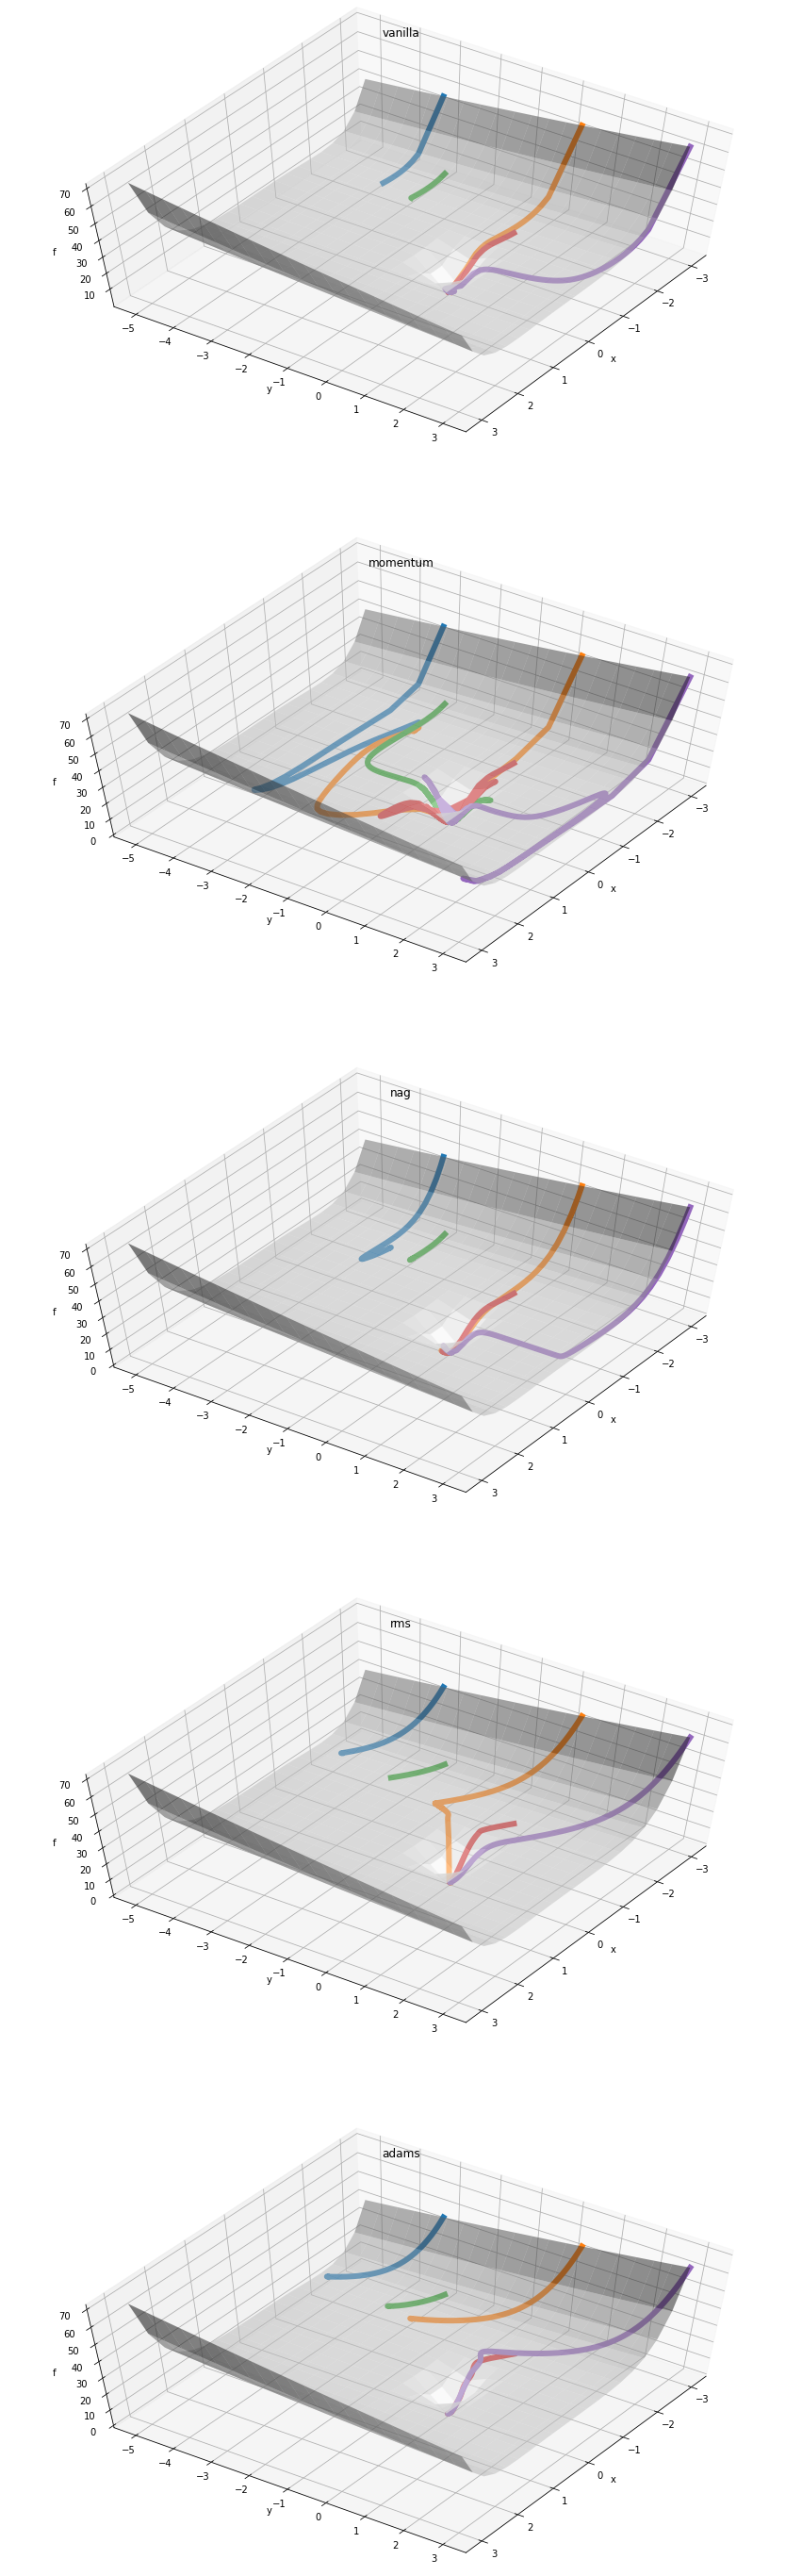

In [148]:
fig = plt.figure(figsize=(15,50))
method_list = []
for key in fun_dict:
    method_list.append(key)

for i in range(5):
    
    ax = fig.add_subplot(5,1, i+1, projection='3d') 
    ax.set_title(method_list[i])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('f')
    
    sample_traj_1 = []
    sample_traj_2 = []
    sample_traj_3 = []
    sample_traj_4 = []
    sample_traj_5 = []
    
    method=i
    
    points = [[0,0],[0,8],[2,2],[4,8],[0,14]]
    
    for point in range(len(points)):
        sample_traj = []
        xs = []
        ys = []
        zs = []
        for k in range(len(trajectories[method][0][0])):

            x = [trajectories[method][points[point][0]][points[point][1]][k][0]]
            y = [trajectories[method][points[point][0]][points[point][1]][k][1]]            

            temp = surf_1(trajectories[method][points[point][0]][points[point][1]][k][0],
                          trajectories[method][points[point][0]][points[point][1]][k][1], b, q, w)
            z = [temp]
            
            zs.append(z[0])
            xs.append(x[0])
            ys.append(y[0])
            
            point_to_plot = np.concatenate((np.asarray(x), np.asarray(y), np.asarray(z)), axis=0)
            sample_traj.append(point_to_plot)
            
        ax.plot(xs,ys,zs,linewidth=6.0)
    
    X = np.linspace(-3, 3, 20)
    Y = np.linspace(-5, 3, 20)
    xm, ym = np.meshgrid(X, Y)
    Z = surf_1(xm, ym, b, q, w)

    surf = ax.plot_surface(xm,ym,Z, cmap = cm.binary, alpha=0.5)
    ax.view_init(60, 35)
    
plt.show()   

# Optional point

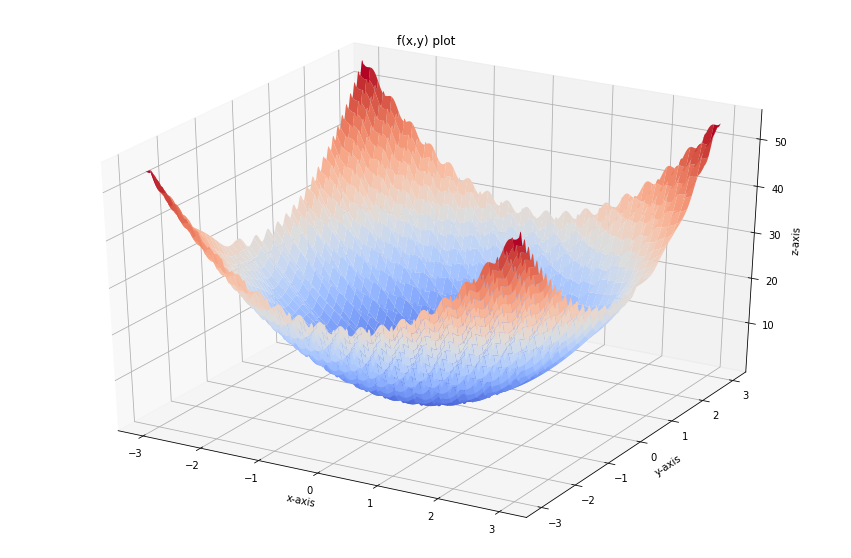

In [149]:
#function parameter
q2 = 6

fig = plt.figure(figsize=(15,10))
ax = fig.gca(projection='3d')

def surf_2(x, y, q2):
    return 1.+.5*q2*(x**2+y**2)-np.cos(2*np.pi*(x*y-y**2))

def grad_surf_2(params):
    x=params[0]
    y=params[1]
    grad_x= q2*x+2*np.pi*y*np.sin(2*np.pi*(x*y-y**2))
    grad_y= q2*y+2*np.pi*(x-2.*y)*np.sin(2*np.pi*(x*y-y**2))
    return [grad_x,grad_y]

X = np.linspace(-3, 3, 500)
Y = np.linspace(-3, 3, 500)
xm, ym = np.meshgrid(X, Y)
Z = surf_2(xm, ym, q2)

surf = ax.plot_surface(xm,ym,Z, cmap = cm.coolwarm)

ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')

plt.title("f(x,y) plot")

plt.show()

In [150]:
trajectories = []
avgs = []
n_epochs = 1000
l_rates = [10**-6,10**-5,10**-4,10**-3,10**-2]

#external cycle over learning rates
for rate in tqdm(l_rates):
    print('Learning rate: ', rate)
    traj_list = []
    avg = []
    init = [0,0]
    
    #looping over cartesian points 
    #cycle over X
    for i in range(len(X)):
        #cycle over Y
        for j in range(len(Y)):
            init[0] = X[i]
            init[1] = Y[j]
            init = np.asarray(init)
            traj_list.append(adams(grad_surf_2, init,n_epochs, rate))
            
       
    traj_list = np.array(traj_list).reshape(len(X),len(Y),n_epochs+1,2)
    trajectories.append(traj_list)
    
    #loop for average calculation
    for e in tqdm(range(n_epochs+1)):
        temp = 0
        for i in range(len(X)):
            for j in range(len(Y)):
                x,y = traj_list[i][j][e]
                temp += surf_2(x, y, q2)
        temp /= len(X)*len(Y)
        avg.append(temp)
    avgs.append(avg)

Learning rate:  1e-06



KeyboardInterrupt: 

In [ ]:
from matplotlib._mathtext_data import (latex_to_bakoma, latex_to_standard,
                                       tex2uni, latex_to_cmex,
                                       stix_virtual_fonts)
x_epoch = np.arange(1,1002,1)

plt.plot(x_epoch,avgs[0], label = 'eta = 1e-06')
plt.plot(x_epoch,avgs[1], label = 'eta = 1e-05')
plt.plot(x_epoch,avgs[2], label = 'eta = 1e-04')
plt.plot(x_epoch,avgs[3], label = 'eta = 1e-03')
plt.plot(x_epoch,avgs[4], label = 'eta = 1e-02')

plt.legend()

plt.xlabel('epoch')
plt.ylabel('fun avg')
plt.title('Adam vs learning rate $\eta$ ')

plt.show()